In [5]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


In [6]:
crime =pd.read_csv("crime_data.csv")

In [7]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
crime.describe

<bound method NDFrame.describe of         Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4    

In [11]:
crime.shape

(50, 5)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_crime_df=scaler.fit_transform(crime.iloc[:,1:])



In [37]:
wcss = []
 #for i in range(1, 11):
   # wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)
    
  


C:\Users\ZomAdmin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


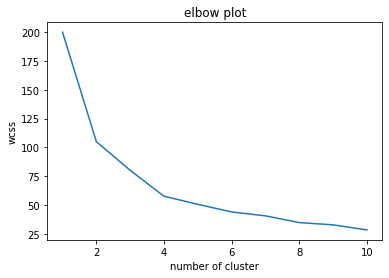

In [40]:
plt.plot(range(1, 11), wcss)
plt.title('elbow plot')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.show()

#plt.plot(range(1, 11), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()
    

In [44]:
from sklearn.cluster import KMeans
new_cluster=KMeans(4,random_state=42)
new_cluster.fit(scaled_crime_df)

KMeans(n_clusters=4, random_state=42)

In [48]:
new_cluster.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [54]:
crime['new_clusterid']=new_cluster.labels_

In [55]:
new_cluster.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [56]:
crime.groupby('new_clusterid').agg(['mean']).reset_index()

,new_clusterid,Murder,Assault,UrbanPop,Rape,new_cluster_label
,,mean,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250,0.0
1,1,13.937500,243.625000,53.750000,21.412500,1.0
2,2,10.815385,257.384615,76.000000,33.192308,2.0
3,3,3.600000,78.538462,52.076923,12.176923,3.0


In [57]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,new_cluster_label,new_clusterid
0,Alabama,13.2,236,58,21.2,1,1
1,Alaska,10.0,263,48,44.5,2,2
2,Arizona,8.1,294,80,31.0,2,2
3,Arkansas,8.8,190,50,19.5,1,1
4,California,9.0,276,91,40.6,2,2
5,Colorado,7.9,204,78,38.7,2,2
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
8,Florida,15.4,335,80,31.9,2,2
9,Georgia,17.4,211,60,25.8,1,1
